# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_results_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
lab_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice.
number_of_mice = lab_results_df["Mouse ID"].nunique()

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
number_of_duplicate_mice= lab_results_df[lab_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]

In [95]:
# Optional: Get all the data for the duplicate mouse ID.
number_of_duplicate_mice_all= lab_results_df[lab_results_df.duplicated(["Mouse ID"], keep=False)]


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanID_lab_results_df= lab_results_df.drop_duplicates(subset="Mouse ID")

In [97]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = cleanID_lab_results_df["Mouse ID"].nunique()

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean= lab_results_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median= lab_results_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance= lab_results_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_stand_dev= lab_results_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = lab_results_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_stats= pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_stand_dev, tumor_SEM], axis=1)
drug_regimen_stats.columns= "Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", "Tumor Volume Stan Dev", "Tumor Volume SEM"
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Stan Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
one_line_drug_regimen_stats = lab_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index()
# Using the aggregation method, produce the same summary statistics in a single line.
one_line_drug_regimen_stats

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, 'Mice Time Points Tested')

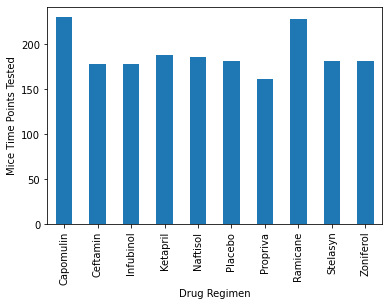

In [148]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_and_drug_regimen= lab_results_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_and_drug_regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Time Points Tested")

Text(0, 0.5, 'Mice Time Points Tested')

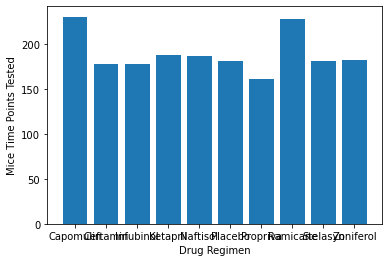

In [190]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint_and_drug_regimen.index, timepoint_and_drug_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Time Points Tested")

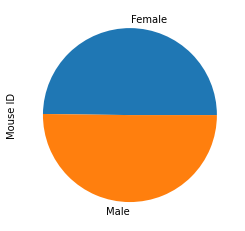

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female= lab_results_df.groupby("Sex").nunique()["Mouse ID"]
male_vs_female.plot(kind="pie")



([<matplotlib.patches.Wedge at 0x1de77297788>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')])

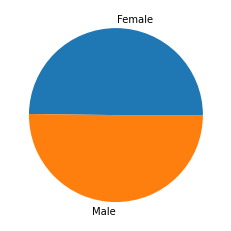

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_vs_female= lab_results_df.groupby("Sex").nunique()["Mouse ID"]
plt.pie(male_vs_female, labels= male_vs_female.index)


## Quartiles, Outliers and Boxplots

In [259]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_df= lab_results_df[lab_results_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
largest_timepoint_four_treatments_df= four_treatments_df.groupby("Mouse ID")["Timepoint"].max()
 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_four_treatments_df= pd.merge(four_treatments_df, largest_timepoint_four_treatments_df, on= "Mouse ID")
filtered_four_treatments_df = merged_four_treatments_df[merged_four_treatments_df["Timepoint_x"] == merged_four_treatments_df["Timepoint_y"]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [289]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_four_names_df= filtered_four_treatments_df["Drug Regimen"].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df= filtered_four_treatments_df["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
iqr1= filtered_four_treatments_df["Tumor Volume (mm3)"].quantile(.25)
iqr2= filtered_four_treatments_df["Tumor Volume (mm3)"].quantile(.75)
iqr= (iqr2 - iqr1) * 1.5
lower_bound_iqr= iqr1 - iqr
upper_bound_iqr = iqr2 + iqr
outliers_filtered_four_treatments_df= filtered_four_treatments_df[(filtered_four_treatments_df["Tumor Volume (mm3)"] < lower_bound_iqr) | (filtered_four_treatments_df["Tumor Volume (mm3)"] > upper_bound_iqr)]   
    

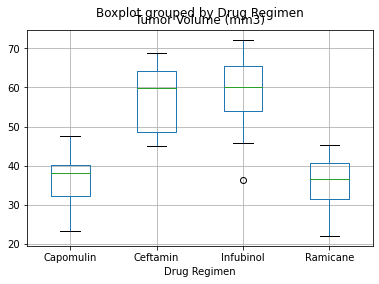

In [291]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
filtered_four_treatments_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen")


## Line and Scatter Plots

c:\Users\steph\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\Users\steph\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
c:\Users\steph\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created

Text(0, 0.5, 'Tumor Volume')

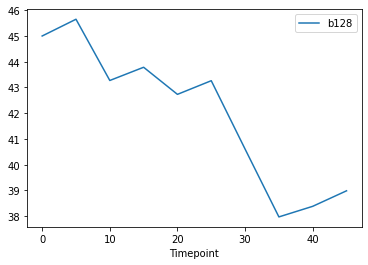

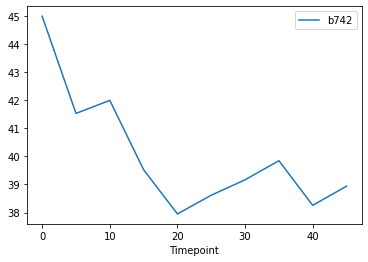

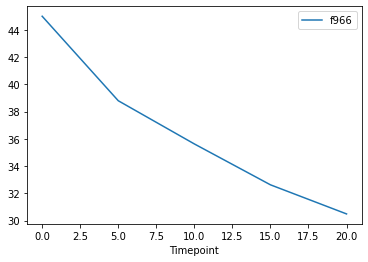

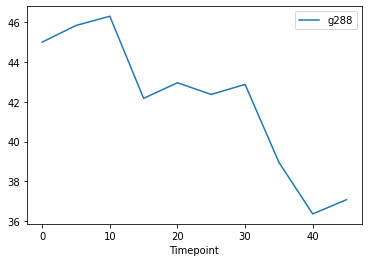

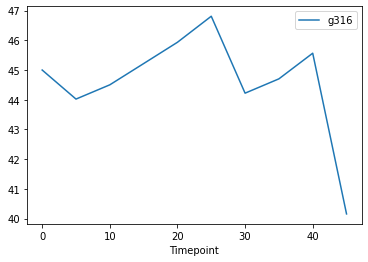

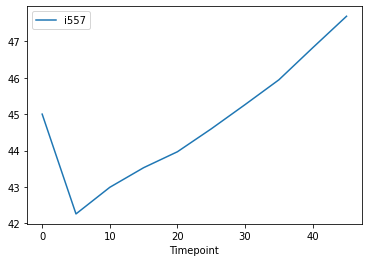

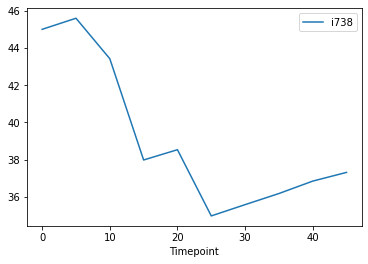

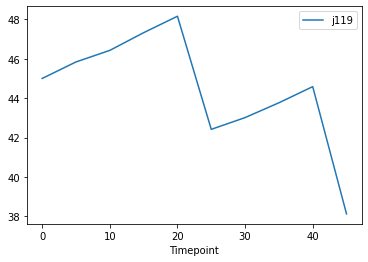

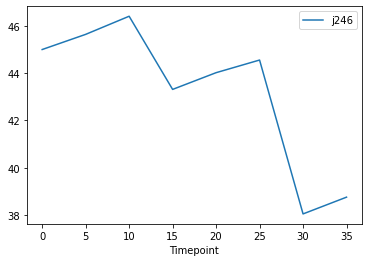

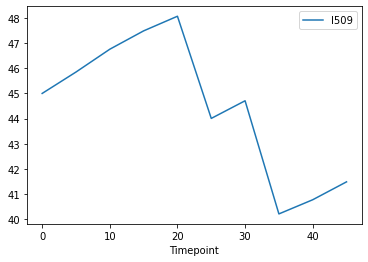

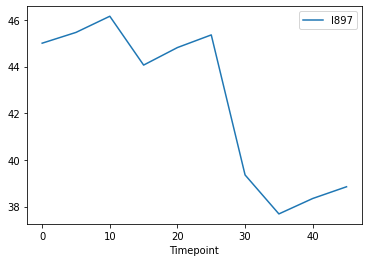

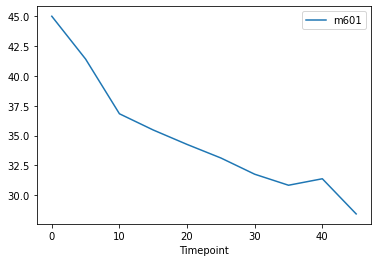

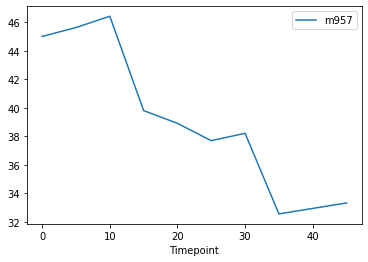

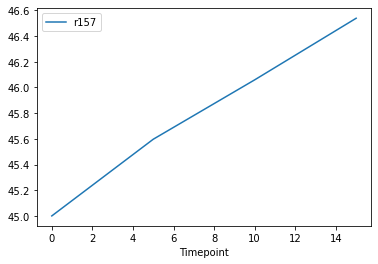

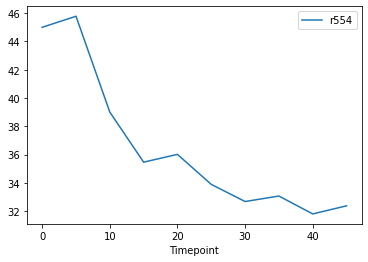

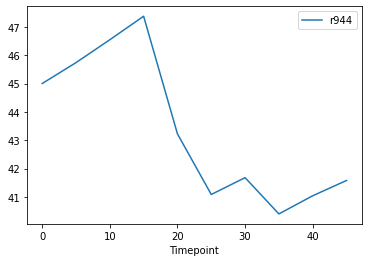

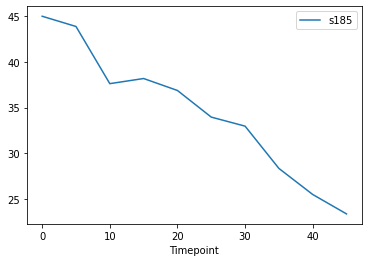

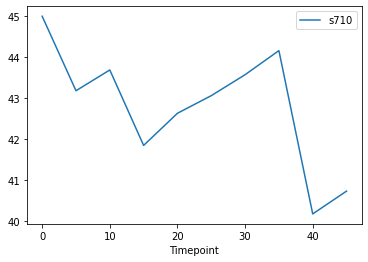

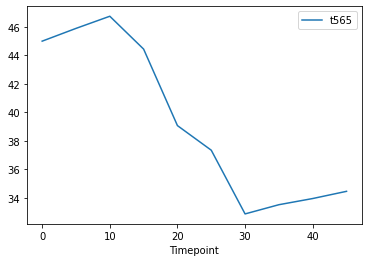

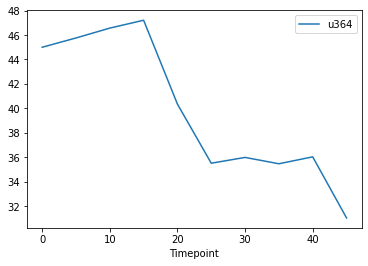

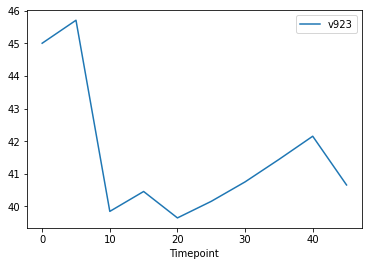

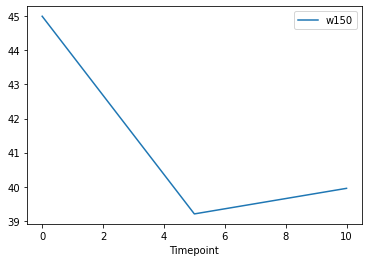

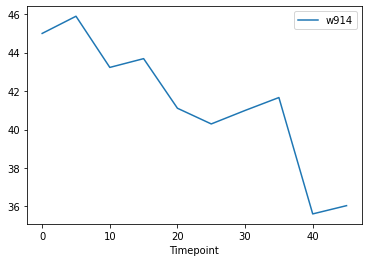

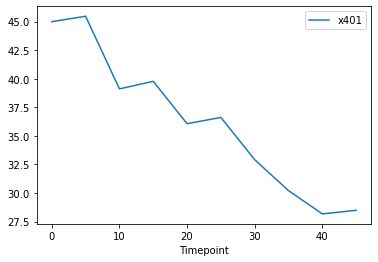

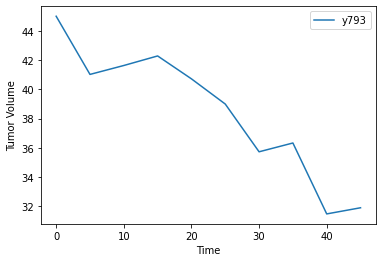

In [302]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomuli_treatments_df= lab_results_df[lab_results_df["Drug Regimen"].isin(["Capomulin"])]
capomuli_mouse_groups= capomuli_treatments_df.groupby("Mouse ID")

for name, capomuli_mouse_groups in capomuli_mouse_groups:
    capomuli_mouse_groups.plot(x="Timepoint", y="Tumor Volume (mm3)", kind= "line", label= name)

plt.xlabel("Time")
plt.ylabel("Tumor Volume")


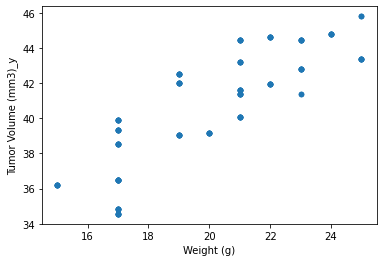

In [313]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomuli_mouse_average_tumor_vol= capomuli_treatments_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
capomuli_mouse_average_tumor_vol_df= pd.merge(capomuli_treatments_df,capomuli_mouse_average_tumor_vol, on="Mouse ID")
capomuli_mouse_average_tumor_vol_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)_y")



## Correlation and Regression

In [324]:
# Calculate the correlation coefficient and linear regression model 
from scipy.stats import pearsonr, linregress
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_capomuli_mouse_average_tumor_vol_df= pearsonr(capomuli_mouse_average_tumor_vol_df["Weight (g)"],capomuli_mouse_average_tumor_vol_df["Tumor Volume (mm3)_y"] )
linear_capomuli_mouse_average_tumor_vol_df= linregress(capomuli_mouse_average_tumor_vol_df["Weight (g)"],capomuli_mouse_average_tumor_vol_df["Tumor Volume (mm3)_y"] )
print("correlation coefficient result", correlation_capomuli_mouse_average_tumor_vol_df)
print(linear_capomuli_mouse_average_tumor_vol_df)


correlation coefficient result (0.8343958614425964, 6.495737656133368e-61)
LinregressResult(slope=0.9609669432428326, intercept=21.489827213299623, rvalue=0.8343958614425941, pvalue=6.495737656142039e-61, stderr=0.04203886745939225)
